<a href="https://colab.research.google.com/github/rakshitrk/CIFAR-10/blob/master/CIFAT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler


In [0]:
bs = 20
ep = 20
val_split = 0.2

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.CIFAR10('data', train = True, download = True, transform = transform)
test_data = datasets.CIFAR10('data', train = False, download = False, transform = transform)


In [0]:
#splitting data to test and validation sets
size = len(train_data)
indices = list(range(size))
split = int(np.floor(val_split * size))
np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(train_data, sampler = train_sampler, batch_size = bs)
val_loader = torch.utils.data.DataLoader(train_data, sampler = val_sampler, batch_size = bs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = bs)

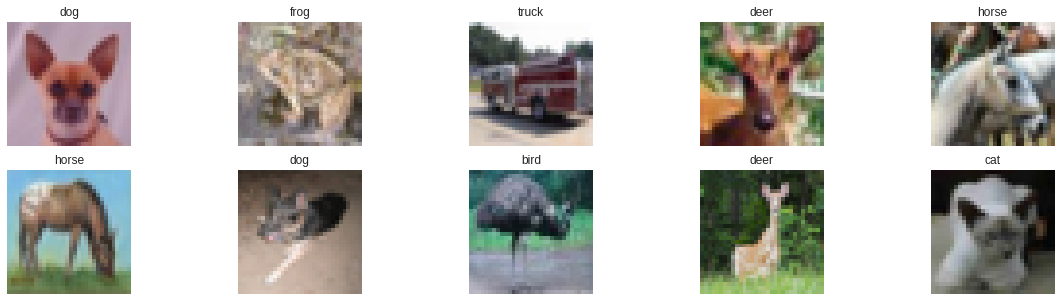

In [0]:
#image classes
classes = ['airoplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def imshow(img):
  img = img/2 + 0.5
  plt.imshow(np.transpose(img,(1,2,0)))
  
 
  
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
  
fig = plt.figure(figsize=(20, 5))

# display 20 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    
    self.conv1 = nn.Conv2d(3,16,3,padding = 1)
    self.conv2 = nn.Conv2d(16,32,3,padding = 1)
    self.conv3 = nn.Conv2d(32,64,3,padding = 1)
    self.pool = nn.MaxPool2d(2,2)
    self.drop = nn.Dropout(0.2)
    self.fc1 = nn.Linear(64*4*4,500)
    self.fc2 = nn.Linear(500,200)
    self.fc3 = nn.Linear(200,10)
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1,64*4*4)
    x = self.drop(x)
    x = F.relu(self.fc1(x))
    x = self.drop(x)
    x = F.relu(self.fc2(x))
    x = self.drop(x)
    x = F.relu(self.fc3(x))
    return x
  
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.2)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


In [0]:
critersion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)

In [0]:
val_loss_min =np.Inf

for epoch in range(ep):
  
    train_loss = 0.0
    val_loss = 0.0
    
    net.train()
    for data,target in train_loader:
      optimizer.zero_grad()
      output = net(data)
      loss = critersion(output, target)
      loss.backward()
      optimizer.step()
      train_loss += loss.item()*data.size(0)
      
    net.eval()
    for data,target in val_loader:
      output = net(data)
      loss = critersion(output, target)
      val_loss += loss.item()*data.size(0)
      
      
    train_loss = train_loss/len(train_loader.dataset)
    val_loss = val_loss/len(val_loader.dataset)
    
    print('Epoch:{}\nTraining Loss:{:6f}\tValidation Loss:{:6f}'.format(epoch,train_loss,val_loss))
      
    if val_loss <= val_loss_min:
      print('Validation Loss Dec. {:6f}--->{:6f}\t...SAVING...'.format(val_loss_min,val_loss))
      torch.save(net.state_dict(),'n.pt')
      val_loss_min = val_loss

Epoch:0
Training Loss:1.159545	Validation Loss:0.267603
Validation Loss Dec.    inf--->0.267603	...SAVING...
Epoch:1
Training Loss:1.068352	Validation Loss:0.262098
Validation Loss Dec. 0.267603--->0.262098	...SAVING...
Epoch:2
Training Loss:0.994978	Validation Loss:0.238088
Validation Loss Dec. 0.262098--->0.238088	...SAVING...
Epoch:3
Training Loss:0.930248	Validation Loss:0.217916
Validation Loss Dec. 0.238088--->0.217916	...SAVING...
Epoch:4
Training Loss:0.876164	Validation Loss:0.205276
Validation Loss Dec. 0.217916--->0.205276	...SAVING...
Epoch:5
Training Loss:0.831858	Validation Loss:0.195710
Validation Loss Dec. 0.205276--->0.195710	...SAVING...
Epoch:6
Training Loss:0.788774	Validation Loss:0.193007
Validation Loss Dec. 0.195710--->0.193007	...SAVING...
Epoch:7
Training Loss:0.750030	Validation Loss:0.181792
Validation Loss Dec. 0.193007--->0.181792	...SAVING...
Epoch:8
Training Loss:0.711466	Validation Loss:0.180640
Validation Loss Dec. 0.181792--->0.180640	...SAVING...
Epo

In [0]:
net.load_state_dict(torch.load('n.pt'))

In [0]:
net.eval()
for data,target in test_loader:
  output = net(data)
  _, pred = torch.max(output, 1)
  
correct = 0
total = 0

for data in test_loader:
  images,labels = data
  output = net(images)
  _, pred = torch.max(output,1)
  
  total += labels.size(0)
  correct += (pred == labels).sum().item()
  
  acc = 100*correct/total
print('Accuracy of model:{}%'.format(acc))
  
  

Accuracy of model:74.03%
